#  Language Detection, Claim Identification, and Sentiment Analysis Project
In today's globalized world, the ability to understand and process multiple languages is more important than ever. This project aims to develop a comprehensive Natural Language Processing (NLP) model that not only detects languages but also identifies claims and analyzes sentiment in textual data. Leveraging a diverse dataset comprising 30 languages, this project seeks to advance the capabilities of multilingual text processing.

## Background on Natural Language Processing (NLP)

Natural Language Processing (NLP) is a field of artificial intelligence that focuses on the interaction between computers and human language. By enabling machines to understand, interpret, and generate human language, NLP bridges the gap between human communication and computer understanding. The evolution of NLP has seen significant milestones, from early rule-based systems to the more advanced machine learning and deep learning models used today.<br>

Key techniques in NLP include tokenization, part-of-speech tagging, named entity recognition, parsing, and sentiment analysis. Modern advancements, particularly with neural networks and transformer-based models like BERT and GPT, have significantly improved the accuracy and capabilities of NLP applications. These advancements enable more nuanced language understanding and generation, making it possible for NLP to be applied in a variety of fields such as customer service, healthcare, finance, and more.<br>

In the context of this project, NLP techniques will be utilized to detect languages, identify claims, and analyze sentiment across texts in 17 different languages. By leveraging the latest advancements in NLP, we aim to build robust models that can handle the complexity and diversity of multilingual text processing.<br>

## About the Dataset

The dataset utilized in this project is a compact yet diverse language detection dataset. It encompasses text details from the following 17 languages:
1. English
2. Malayalam
3. Hindi
4. Tamil
5. Kannada
6. French
7. Spanish
8. Portuguese
9. Italian
10. Russian
11. Swedish
12. Dutch
13. Arabic
14. Turkish
15. German
16. Danish
17. Greek
### Source
[Claim detection](https://www.kaggle.com/datasets/shankhad/claim-detection-all)<br>
[Language detection](https://www.kaggle.com/datasets/basilb2s/language-detection/data)<br>
[Language Identification dataset](https://www.kaggle.com/datasets/zarajamshaid/language-identification-datasst)<br>
[Sentiment analysis](https://www.kaggle.com/datasets/shankhad/sentiment-analysis-all)<br>
[Glove300](https://www.kaggle.com/datasets/shankhad/glove300)

## Objectives

- Language Detection: Build an NLP model capable of accurately identifying the language of a given text from the 17 provided languages.
- Claim Identification: Develop algorithms to detect and extract claims or statements from the text, regardless of the language.
- Sentiment Analysis: Implement sentiment analysis tools to determine the emotional tone or sentiment (positive, negative, or neutral) of the text in various languages.

## Significance

This project holds significant value for various applications such as social media monitoring, customer feedback analysis, and content moderation, where understanding multiple languages and deriving insights from text is crucial. By achieving these objectives, we aim to contribute to the broader field of NLP and enhance the tools available for multilingual text analysis.

## Libraries


In [67]:
import numpy as np
from numpy import asarray
from numpy import zeros
import pandas as pd
import tensorflow as tf
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, MaxPooling1D, GlobalMaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import Conv1D, LSTM, GRU, SimpleRNN, Embedding, Bidirectional, Dropout
from tensorflow.keras.models import Model, Sequential, save_model
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.layers import concatenate
from keras import callbacks

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Preprocessing Data
### Data Path Loading

In [2]:
df_claim=pd.read_csv('Data\claim-detection-all.csv')
df_sentiment=pd.read_csv('Data\sentiment_analysis-all.csv')
df_lang_1=pd.read_csv('Data\dataset.csv')
df_lang_2=pd.read_csv('Data\Language Detection.csv')

DataFrame `df_claim` with raw data

In [3]:
df_claim.head()

,Unnamed: 0,text,claim
0,0,"Also , thinned out superfluous links .",N
1,1,"As to the two points , Guttmacher himself died...",Y
2,2,Cybercast New Service is not a neutral source .,Y
3,3,I am satisfied with Severa 's proposed comprom...,Y
4,4,"I have moved it too , but I will not move it b...",N


A series of transformations will be applied to the DataFrame `df_claim`

In [4]:
df_claim=df_claim.drop(['Unnamed: 0'], axis=1)
claim2id={'N': 0, 'Y':1}
df_claim['claim']=df_claim['claim'].apply(lambda x: claim2id[x])

In [5]:
# Split into training and test sets
seed=42
df_train_claim, df_test_claim=train_test_split(df_claim, test_size=0.2, random_state=seed)
df_train_claim.head()

,text,claim
3585,"Sax , on the other hand , is kind of a socio...",1
2701,"Taking on the Panther-ness , representing the ...",1
7771,@sardesairajdeep Thank god. At least he knows ...,1
7092,RT @Stunneri: abeg let someone bring a cure fo...,0
11343,The Woodward book has already been refuted and...,1


In [6]:
df_test_claim.head()

,text,claim
251,It would seem the reference is an excellent th...,1
6070,@evankirstel Or was (disappeared) the lead CCP...,1
6596,should be trusted to manage the coronavirusout...,0
5426,Correction: The MLK bust is still in the Oval ...,1
11119,Wow. So it seems covering yourself in #JesusBl...,0


DataFrame `df_sentiment` with raw data

In [7]:
df_sentiment.head()

,Unnamed: 0,text,sentiment
0,0,"I`d have responded, if I were going",neutral
1,1,Sooo SAD I will miss you here in San Diego!!!,negative
2,2,my boss is bullying me...,negative
3,3,what interview! leave me alone,negative
4,4,"Sons of ****, why couldn`t they put them on t...",negative


A series of transformations will be applied to the DataFrame `df_sentiment`

In [8]:
# Remove NaN values
df_sentiment=df_sentiment.dropna()

df_sentiment=df_sentiment.drop(['Unnamed: 0'], axis=1)
sentiment2id={'positive':0, 'negative':1, 'neutral':2}
df_sentiment['sentiment']=df_sentiment['sentiment'].apply(lambda x: sentiment2id[x])

In [9]:
# Split into training and test sets
df_train_sentiment, df_test_sentiment=train_test_split(df_sentiment, train_size=len(df_train_claim), test_size=len(df_test_claim), random_state=seed)

df_train_sentiment.head()

,text,sentiment
12828,Building Websites,2
16468,is still pretty depressed about losing her hel...,1
5197,blahh i`m tired and i gotta go to the airport ...,1
20204,Hehe! It is nice down there,0
16920,won`t be going to the Oxford Internet Institut...,1


In [10]:
df_test_sentiment.head()

,text,sentiment
22131,I was afraid you were going to say that.,1
15632,part 2: social networking??.. there is even r...,2
17622,i miss the one who would do anything to spend ...,1
25332,tee we beefin....what was u supposed to do b...,2
26008,Happy Hug Your Mom Day!! love you mom,0


A series of transformations will be applied to the DataFrames `df_lang_1` and `df_lang_2`

In [11]:
df_lang_2=df_lang_2.rename(columns={'Language':'language'})
df_lang=pd.concat([df_lang_1, df_lang_2], ignore_index=True)

In [12]:
# Split into training and test sets
df_train_lang, df_test_lang=train_test_split(df_lang, train_size=len(df_train_claim), test_size=len(df_test_claim), random_state=seed)

This code segment uses a `LabelEncoder` to transform categorical labels in a DataFrame column into numerical values.

In [13]:
le=LabelEncoder()
df_lang['language']=le.fit_transform(df_lang['language'])
df_lang['language'].unique()

array([ 5, 24, 27, 26,  3, 12, 28, 15, 29, 10, 19,  6,  1, 14,  9, 23, 20,
       17, 21, 22,  4,  0, 16, 18,  8,  2, 11, 25,  7, 13])

This code segment uses a `LabelEncoder` to decode numerical values back into their original categorical labels and adds the decoded labels to the DataFrame.

In [14]:
decoded_languages=le.inverse_transform(df_lang['language'])
df_lang['decoded_language']=decoded_languages
df_lang

,Text,language,decoded_language
0,klement gottwaldi surnukeha palsameeriti ning ...,5,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,24,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,27,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,26,Tamil
4,de spons behoort tot het geslacht haliclona en...,3,Dutch
...,...,...,...
32332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,13,Kannada
32333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,13,Kannada
32334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,13,Kannada
32335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,13,Kannada


In [15]:
unique_decoded_languages=sorted(df_lang['decoded_language'].unique())
unique_language=sorted(df_lang['language'].unique())

print("="*60)
print("Unique Decoded Languages (Ascending Order):")
for i in range(len(unique_decoded_languages)):
    print(f"Language: {unique_decoded_languages[i]} - Code: {i}")
print("="*60)

Unique Decoded Languages (Ascending Order):
Language: Arabic - Code: 0
Language: Chinese - Code: 1
Language: Danish - Code: 2
Language: Dutch - Code: 3
Language: English - Code: 4
Language: Estonian - Code: 5
Language: French - Code: 6
Language: German - Code: 7
Language: Greek - Code: 8
Language: Hindi - Code: 9
Language: Indonesian - Code: 10
Language: Italian - Code: 11
Language: Japanese - Code: 12
Language: Kannada - Code: 13
Language: Korean - Code: 14
Language: Latin - Code: 15
Language: Malayalam - Code: 16
Language: Persian - Code: 17
Language: Portugeese - Code: 18
Language: Portugese - Code: 19
Language: Pushto - Code: 20
Language: Romanian - Code: 21
Language: Russian - Code: 22
Language: Spanish - Code: 23
Language: Swedish - Code: 24
Language: Sweedish - Code: 25
Language: Tamil - Code: 26
Language: Thai - Code: 27
Language: Turkish - Code: 28
Language: Urdu - Code: 29


This code segment uses a `LabelEncoder` to transform categorical labels into numerical values for both training and test datasets.

In [16]:
df_train_lang['language']=le.transform(df_train_lang['language'])
df_test_lang['language']=le.transform(df_test_lang['language'])

In [17]:
df_train_lang.head()

,Text,language
17739,گلخانه باغ ایرانی متعلق به مجوعه سعدآباد بوده ...,17
21311,இலக்கியம் ஒரு முழுமையான நுண்கலை அதற்கென ஒரு தன...,26
14851,तेय़ार कर रहें हैं। उन के काम की सब से बड़ी मु...,9
26618,wees voorzichtig.,3
17688,그는 일본의 조선 병합은 일본의 영토 팽창 욕구만이 있는게 아니라 일본이 아시아를 ...,14


In [18]:
df_test_lang.head()

,Text,language
16151,मस्तिष्क ज्वर के दौरान बड़े स्तर पर सबअर्कनॉएड...,9
19058,اوبه دځمکې هوا تنظيموي که اوبه نه وي نودهوا تو...,20
30688,om du vill tacka någon kan du säga att det är ...,25
23314,thanking people.,4
29228,molto più semplice dell'HTML) il software Medi...,11


### Convert sentences to sequences
This code converts text data from different datasets (claim, sentiment, and language) into numerical sequences using a Tokenizer. This numerical representation is typically used as input for machine learning models.<br><br>
__1. Initialization:__

In [19]:
# Sets the maximum size of the vocabulary to 20,000 words
MAX_VOCAB_SIZE=20000
# Specifies whether the tokenizer should convert all characters to lowercase. In this case, it will not
should_lowercase=False

# Creates an instance of the Tokenizer 
tokenizer=Tokenizer(num_words=MAX_VOCAB_SIZE,
                    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', # Defines characters to filter out from the text.
                    lower=should_lowercase,
                    oov_token='UNK' # Specifies a token for out-of-vocabulary words, labeled as "UNK" (Unknown)
                    )

__2. Fit and transform text:__

In [20]:
# Fits the tokenizer on the 'text' column of the df_train_claim DataFrame, creating a word index based on the training claim texts
tokenizer.fit_on_texts(df_train_claim['text'])
# Converts the claim training texts into sequences of integers based on the fitted tokenizer
sequences_train_claim=tokenizer.texts_to_sequences(df_train_claim['text'])
# Converts the claim test texts into sequences of integers based on the fitted tokenizer
sequences_test_claim=tokenizer.texts_to_sequences(df_test_claim['text'])

# Fits the tokenizer on the 'text' column of the df_train_sentiment DataFrame, creating a word index based on the training sentiment texts
tokenizer.fit_on_texts(df_train_sentiment['text'])
# Converts the sentiment training texts into sequences of integers based on the fitted tokenizer
sequences_train_sentiment=tokenizer.texts_to_sequences(df_train_sentiment['text'])
# Converts the sentiment test texts into sequences of integers based on the fitted tokenizer
sequence_test_sentiment=tokenizer.texts_to_sequences(df_test_sentiment['text'])

# Fits the tokenizer on the 'Text' column of the df_train_lang DataFrame, creating a word index based on the training language texts
tokenizer.fit_on_texts(df_train_lang['Text'])
# Converts the language training texts into sequences of integers based on the fitted tokenizer
sequences_train_lang=tokenizer.texts_to_sequences(df_train_lang['Text'])
# Converts the language test texts into sequences of integers based on the fitted tokenizer
sequences_test_lang=tokenizer.texts_to_sequences(df_test_lang['Text'])

This code calculates and displays the length of the vocabulary used by the `Tokenizer`

In [21]:
vocab_length=len(tokenizer.word_index)+1
print(f"Vocabulary length: {vocab_length}")

Vocabulary length: 157577


This code segment processes sequences of text data by padding them to a uniform length and then calculates and displays the lengths of the padded sequences.

In [22]:
D=300 # Sets the maximum length (maxlen) of the padded sequences to 300

X_train_claim=pad_sequences(sequences_train_claim, padding='post', maxlen=D)
X_test_claim=pad_sequences(sequences_test_claim, padding='post', maxlen=D)

X_train_sentiment=pad_sequences(sequences_train_sentiment, padding='post', maxlen=D)
X_test_sentiment=pad_sequences(sequence_test_sentiment, padding='post', maxlen=D)

X_train_lang=pad_sequences(sequences_train_lang, padding='post', maxlen=D)
X_test_lang=pad_sequences(sequences_test_lang, padding='post', maxlen=D)

Creates a tuple T containing the lengths of the padded sequences for the training data of claims, sentiment, and language. Each element of the tuple is the second dimension (shape[1]) of the respective padded sequences array, which should all be 300 in this case.

In [23]:
T=(X_train_claim.shape[1], X_train_sentiment.shape[1], X_train_lang.shape[1])

# Showing the lengths of the padded sequences for each dataset
T

(300, 300, 300)

### Word Embeddings
This code segment loads GloVe word embeddings from a file and creates an embeddings dictionary where each word is mapped to its corresponding vector representation.

In [24]:
embeddings_dictionary=dict()
glove_file=open('Data\glove.6B.300d.txt', encoding="utf8")

for line in glove_file:
    records=line.split()
    word=records[0] # Extracts the word from the first component of the split line
    vector_dimensions=asarray(records[1:], dtype='float32') # Converts the remaining components (vector dimensions) into a NumPy array of type float32
    embeddings_dictionary[word]=vector_dimensions

glove_file.close

<function TextIOWrapper.close()>

This code segment creates an embedding matrix for a vocabulary using pre-trained GloVe embeddings.

In [25]:
embedding_matrix=zeros((vocab_length, 300))

for word, index in tokenizer.word_index.items():
    embedding_vector=embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index]=embedding_vector

In [26]:
embedding_matrix.shape

(157577, 300)

## Building model
This code segment defines a multi-input, multi-output neural network using Keras. It processes three different input sequences and makes predictions for three different tasks: claim classification, sentiment analysis, and language identification.<br><br>
__Define Inputs:__

In [27]:
i=Input(shape=(300,)) # Defines an input tensor i with shape (300,)
j=Input(shape=(300,)) # Defines an input tensor j with shape (300,)
k=Input(shape=(300,)) # Defines an input tensor k with shape (300,)

__Combine inputs__<br><br>
Concatenates the three input tensors along the last axis to form a single combined tensor.

In [28]:
combined=concatenate([i, j, k])

__Embedding Layer__

In [29]:
x=Embedding(vocab_length, 300, weights=[embedding_matrix], input_length=T, trainable=False)(combined)
x=Bidirectional(LSTM(512, return_sequences=True, activation='tanh'))(x)
x=Dropout(0.5)(x)
x=Bidirectional(LSTM(64, return_sequences=True, activation='tanh'))(x)
x=GlobalMaxPooling1D()(x) # Applies global max pooling to reduce the dimensionality of the sequence outputs

# Adds a dense layer with 64 units and 'tanh' activation for each classification
x_claim_1=Dense(64, activation='tanh')(x)
x_sentiment_1=Dense(64, activation='tanh')(x)
x_lang_1=Dense(64, activation='tanh')(x)

# Adds a dropout layer with 50% dropout rate to each classification path
x_claim_2=Dropout(0.5)(x_claim_1)
x_sentiment_2=Dropout(0.5)(x_sentiment_1)
x_lang_2=Dropout(0.5)(x_lang_1)

# Concatenates the dropout layers of sentiment analysis and claim classification paths
combined1=concatenate([x_sentiment_2, x_claim_2])
# Concatenates the dense layers of sentiment analysis, claim classification, and the dropout layer of language identification paths
combined2=concatenate([x_sentiment_1, x_claim_1, x_lang_2])

# dds a dense layer with a sigmoid activation function for binary claim classification
x_claim=Dense(1, activation='sigmoid', name='claim')(x_claim_2)
# Adds a dense layer with a softmax activation function for sentiment analysis with 3 classes
x_sentiment=Dense(3, activation='softmax', name='sentiment')(combined1)
# Adds a dense layer with a softmax activation function for language identification with a number of classes equal to the number of unique languages in the df_lang DataFrame
x_lang=Dense(len(df_lang['language'].unique()), activation='softmax', name='lang')(combined2)

# Create model
model=Model(inputs=[i, j, k], outputs=[x_claim, x_sentiment, x_lang])

In [30]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 900)       │          0 │ input_layer[0][0… │
│ (Concatenate)       │                   │            │ input_layer_1[0]… │
│                     │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 900, 300)  │ 47,273,100 │ concatenate[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 900, 1024) │  3,330,048 │ embedding[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 900, 1024) │          0 │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 900, 128)  │    557,568 │ dropout[0][0]     │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ bidirectional_1[… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      8,256 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 128)       │          0 │ dropout_2[0][0],  │
│ (Concatenate)       │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 192)       │          0 │ dense_1[0][0],    │
│ (Concatenate)       │                   │            │ dense[0][0],      │
│                     │                   │            │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ claim (Dense)       │ (None, 1)         │         65 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sentiment (Dense)   │ (None, 3)         │        387 │ concatenate_1[0]

 Total params: 51,191,726 (195.28 MB)

 Trainable params: 3,918,626 (14.95 MB)

 Non-trainable params: 47,273,100 (180.33 MB)

### Compile and fit
This code segment compiles and fits a multi-output neural network model using the Adam optimizer and specific loss functions for each output

In [31]:
learning_rate=0.00005
opt=Adam(learning_rate)
#opt=RMSprop(learning_rate)
#opt=SGD(learning_rate)

model.compile(
    optimizer=opt,
    loss={
        'claim': 'binary_crossentropy', 
        'sentiment': 'sparse_categorical_crossentropy', 
        'lang': 'sparse_categorical_crossentropy'
    },
    metrics={
        'claim': 'accuracy', 
        'sentiment': 'accuracy', 
        'lang': 'accuracy'
    }
)

This code sets up an early stopping mechanism to halt training when the validation loss stops improving for 4 consecutive epochs, and it restores the model's weights to those from the epoch with the best validation loss. This technique helps in preventing overfitting and ensures that the best model is used.

In [32]:
earlystopping=callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=4, restore_best_weights=True)

This code trains the neural network model on the training data for claims, sentiment, and language identification, using a batch size of 64 and running for up to 35 epochs. The validation data is used to monitor the model's performance, and early stopping is employed to halt training if the validation loss does not improve for 4 consecutive epochs, ensuring the best model weights are restored.

In [33]:
h=model.fit(
    x=[X_train_claim, X_train_sentiment, X_train_lang],
    y=[df_train_claim['claim'], df_train_sentiment['sentiment'], df_train_lang['language']],
    epochs=35,
    batch_size=64,
    validation_data=(
        [X_test_claim, X_test_sentiment, X_test_lang], 
        [df_test_claim['claim'], df_test_sentiment['sentiment'], df_test_lang['language']]
    ),
    callbacks=[earlystopping]
)

Epoch 1/35
143/143 ━━━━━━━━━━━━━━━━━━━━ 1439s 10s/step - claim_accuracy: 0.7353 - lang_accuracy: 0.1333 - loss: 4.9440 - sentiment_accuracy: 0.3602 - val_claim_accuracy: 0.7635 - val_lang_accuracy: 0.3086 - val_loss: 4.4179 - val_sentiment_accuracy: 0.3925
Epoch 2/35
143/143 ━━━━━━━━━━━━━━━━━━━━ 1518s 11s/step - claim_accuracy: 0.7756 - lang_accuracy: 0.3448 - loss: 4.2711 - sentiment_accuracy: 0.3683 - val_claim_accuracy: 0.7635 - val_lang_accuracy: 0.4800 - val_loss: 3.8203 - val_sentiment_accuracy: 0.3903
Epoch 3/35
143/143 ━━━━━━━━━━━━━━━━━━━━ 1586s 11s/step - claim_accuracy: 0.7782 - lang_accuracy: 0.5237 - loss: 3.6825 - sentiment_accuracy: 0.3763 - val_claim_accuracy: 0.7635 - val_lang_accuracy: 0.5635 - val_loss: 3.3999 - val_sentiment_accuracy: 0.3934
Epoch 4/35
143/143 ━━━━━━━━━━━━━━━━━━━━ 1610s 11s/step - claim_accuracy: 0.7721 - lang_accuracy: 0.5701 - loss: 3.4421 - sentiment_accuracy: 0.3710 - val_claim_accuracy: 0.7635 - val_lang_accuracy: 0.5851 - val_loss: 3.2318 - val

### Plotting

In [38]:
history=h.history

# Set the style for the plots
sns.set(style='whitegrid')

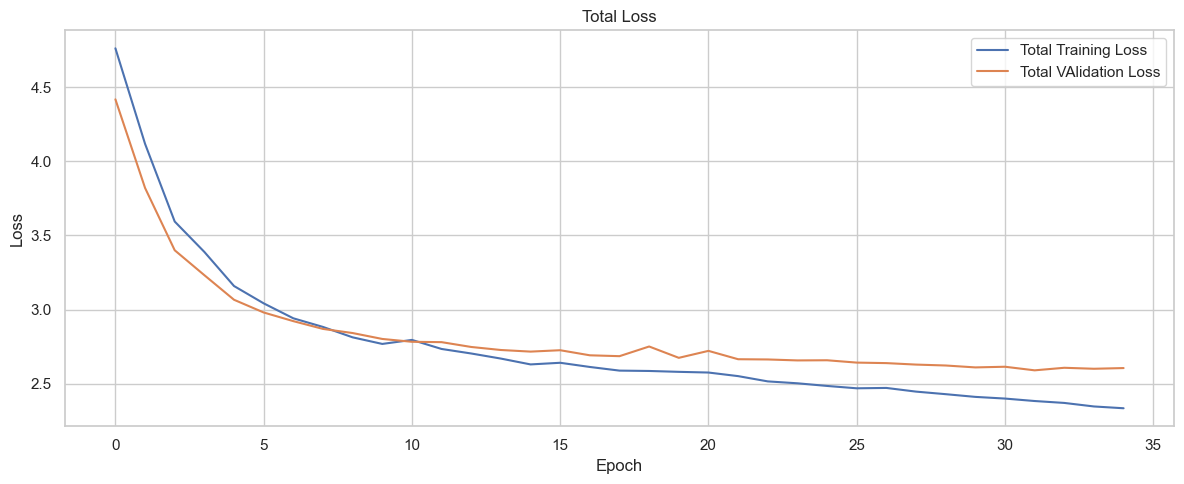

In [42]:
# Calculate total loss(sum of individual losses)
total_loss_train=[history['loss'][i] for i in range(len(history['loss']))]
total_loss_val=[history['val_loss'][i] for i in range(len(history['val_loss']))]

# Create a figure and axes for the plots
fig, axs=plt.subplots(1, 1, figsize=(12, 5))

# Plot for total loss
axs.plot(total_loss_train, label='Total Training Loss')
axs.plot(total_loss_val, label='Total VAlidation Loss')
axs.set_title('Total Loss')
axs.set_xlabel('Epoch')
axs.set_ylabel('Loss')
axs.legend()

# Show the plot
plt.tight_layout()
plt.show()

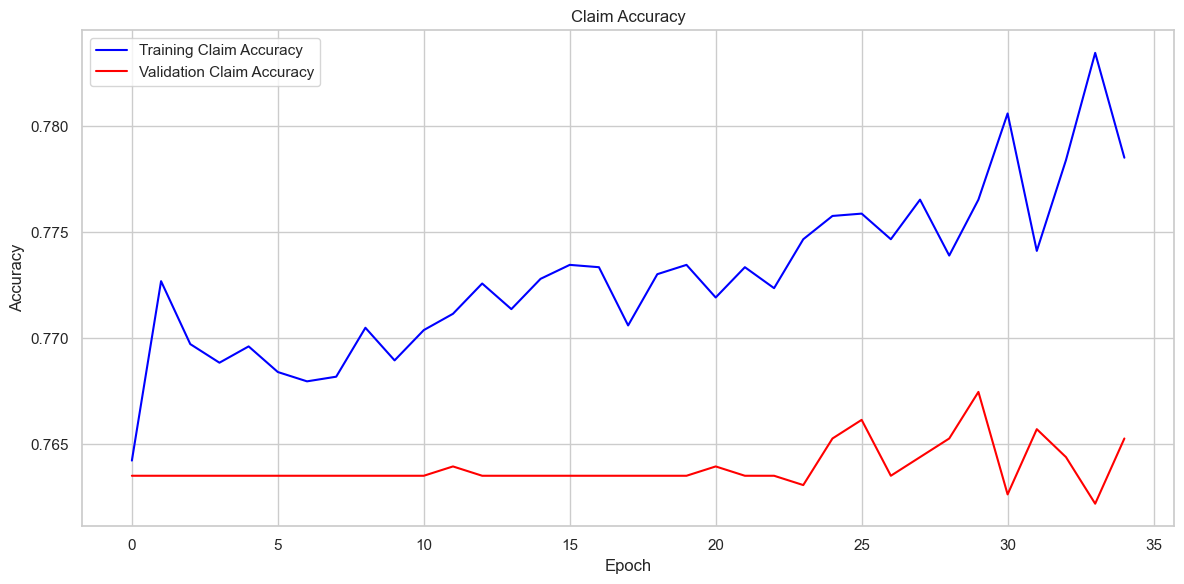

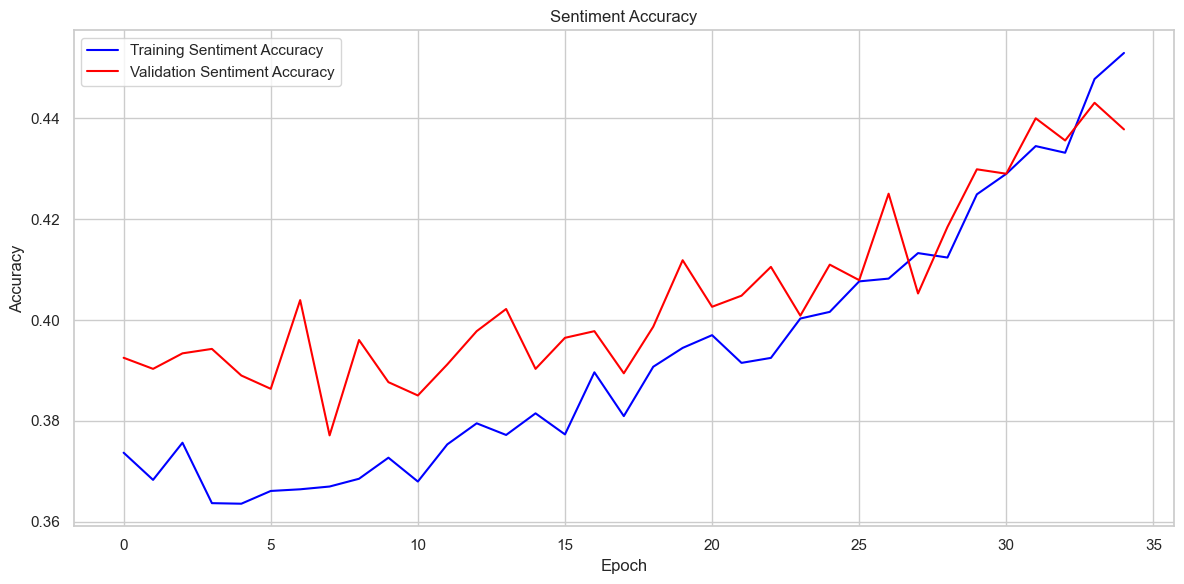

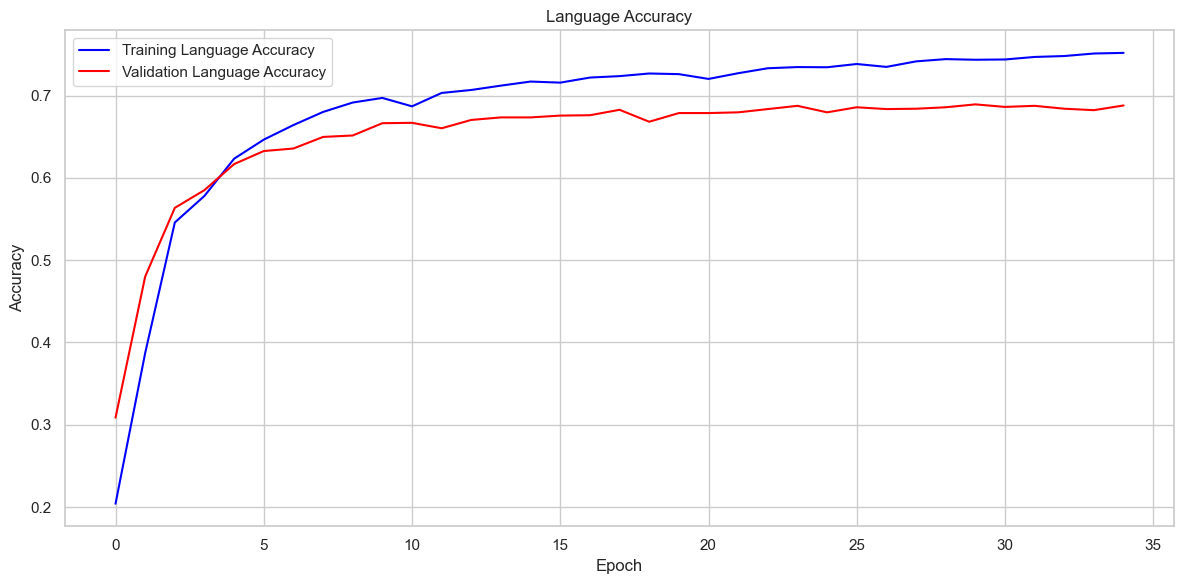

In [43]:
# Create plots for each accuracy metric
metrics = {
    'Claim Accuracy': ['claim_accuracy', 'val_claim_accuracy'],
    'Sentiment Accuracy': ['sentiment_accuracy', 'val_sentiment_accuracy'],
    'Language Accuracy': ['lang_accuracy', 'val_lang_accuracy']
}

for metric_name, keys in metrics.items():
    plt.figure(figsize=(12, 6))
    plt.plot(history[keys[0]], label='Training ' + metric_name, color='blue')
    plt.plot(history[keys[1]], label='Validation ' + metric_name, color='red')
    plt.title(metric_name)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

### Saving model

In [68]:
# Define the directory path and model file name
directory='saved_model'
model_file='prediction_model.h5'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Define the full path for saving the model
model_path=os.path.join(directory, model_file)

# Save the model to the specified path
model.save(model_path)

print(f"Model saved successfully to {model_path}.")

Model saved successfully to saved_model\prediction_model.h5.


### Getting predictions

In [44]:
test_probs=model.predict([X_test_claim, X_test_sentiment, X_test_lang])

72/72 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step


In [45]:
test_pred_claim=list(test_probs[0])
test_pred_sentiment=list(test_probs[1])
test_pred_lang=list(test_probs[2])

- `probabilities_claim`: Contains binary predictions (0 or 1) for claim classification based on a threshold.
- `probabilities_sentiment`: Contains indices representing the predicted sentiment classes.
- `probabilities_lang`: Contains indices representing the predicted language classes.

In [46]:
probabilities_claim=[]
probabilities_sentiment=[]
probabilities_lang=[]

for val in test_pred_claim:
    if val>0.5:
        probabilities_claim.append(1)
    else:
        probabilities_claim.append(0)

for val in test_pred_sentiment:
    probabilities_sentiment.append(np.argmax(val))

for val in test_pred_lang:
    probabilities_lang.append(np.argmax(val))

In [49]:
acc_score_cl=accuracy_score(df_test_claim['claim'], probabilities_claim)
f_score_cl=f1_score(df_test_claim['claim'], probabilities_claim, average='macro')
pre_score_cl=precision_score(df_test_claim['claim'], probabilities_claim, average='macro')
rec_score_cl=recall_score(df_test_claim['claim'], probabilities_claim, average='macro')

print('Claim...')
print(f"Test acc: {np.round(acc_score_cl, 5)}")
print(f"Test f1: {np.round(f_score_cl, 5)}")
print(f"Test precision: {np.round(pre_score_cl, 5)}")
print(f"Test recall: {np.round(rec_score_cl, 5)}")

Claim...
Test acc: 0.76571
Test f1: 0.46948
Test precision: 0.66828
Test recall: 0.51491


In [48]:
acc_score_sent=accuracy_score(df_test_sentiment['sentiment'], probabilities_sentiment)
f_score_sent=f1_score(df_test_sentiment['sentiment'], probabilities_sentiment, average='macro')
pre_score_sent=precision_score(df_test_sentiment['sentiment'], probabilities_sentiment, average='macro')
rec_score_sent=recall_score(df_test_sentiment['sentiment'], probabilities_sentiment, average='macro')

print('Sentiment...')
print(f"Test acc: {np.round(acc_score_sent, 5)}")
print(f"Test f1: {np.round(f_score_sent, 5)}")
print(f"Test precision: {np.round(pre_score_sent, 5)}")
print(f"Test recall: {np.round(rec_score_sent, 5)}")

Sentiment...
Test acc: 0.44
Test f1: 0.36282
Test precision: 0.42416
Test recall: 0.39525


In [50]:
acc_score_lan=accuracy_score(df_test_lang['language'], probabilities_lang)
f_score_lan=f1_score(df_test_lang['language'], probabilities_lang, average='macro')
pre_score_lan=precision_score(df_test_lang['language'], probabilities_lang, average='macro')
rec_score_lan=recall_score(df_test_lang['language'], probabilities_lang, average='macro')

print('Language...')
print(f"Test acc: {np.round(acc_score_lan, 5)}")
print(f"Test f1: {np.round(f_score_lan, 5)}")
print(f"Test precision: {np.round(pre_score_lan, 5)}")
print(f"Test recall: {np.round(rec_score_lan, 5)}")

Language...
Test acc: 0.68747
Test f1: 0.63292
Test precision: 0.66561
Test recall: 0.63626


#### Plotting metrics

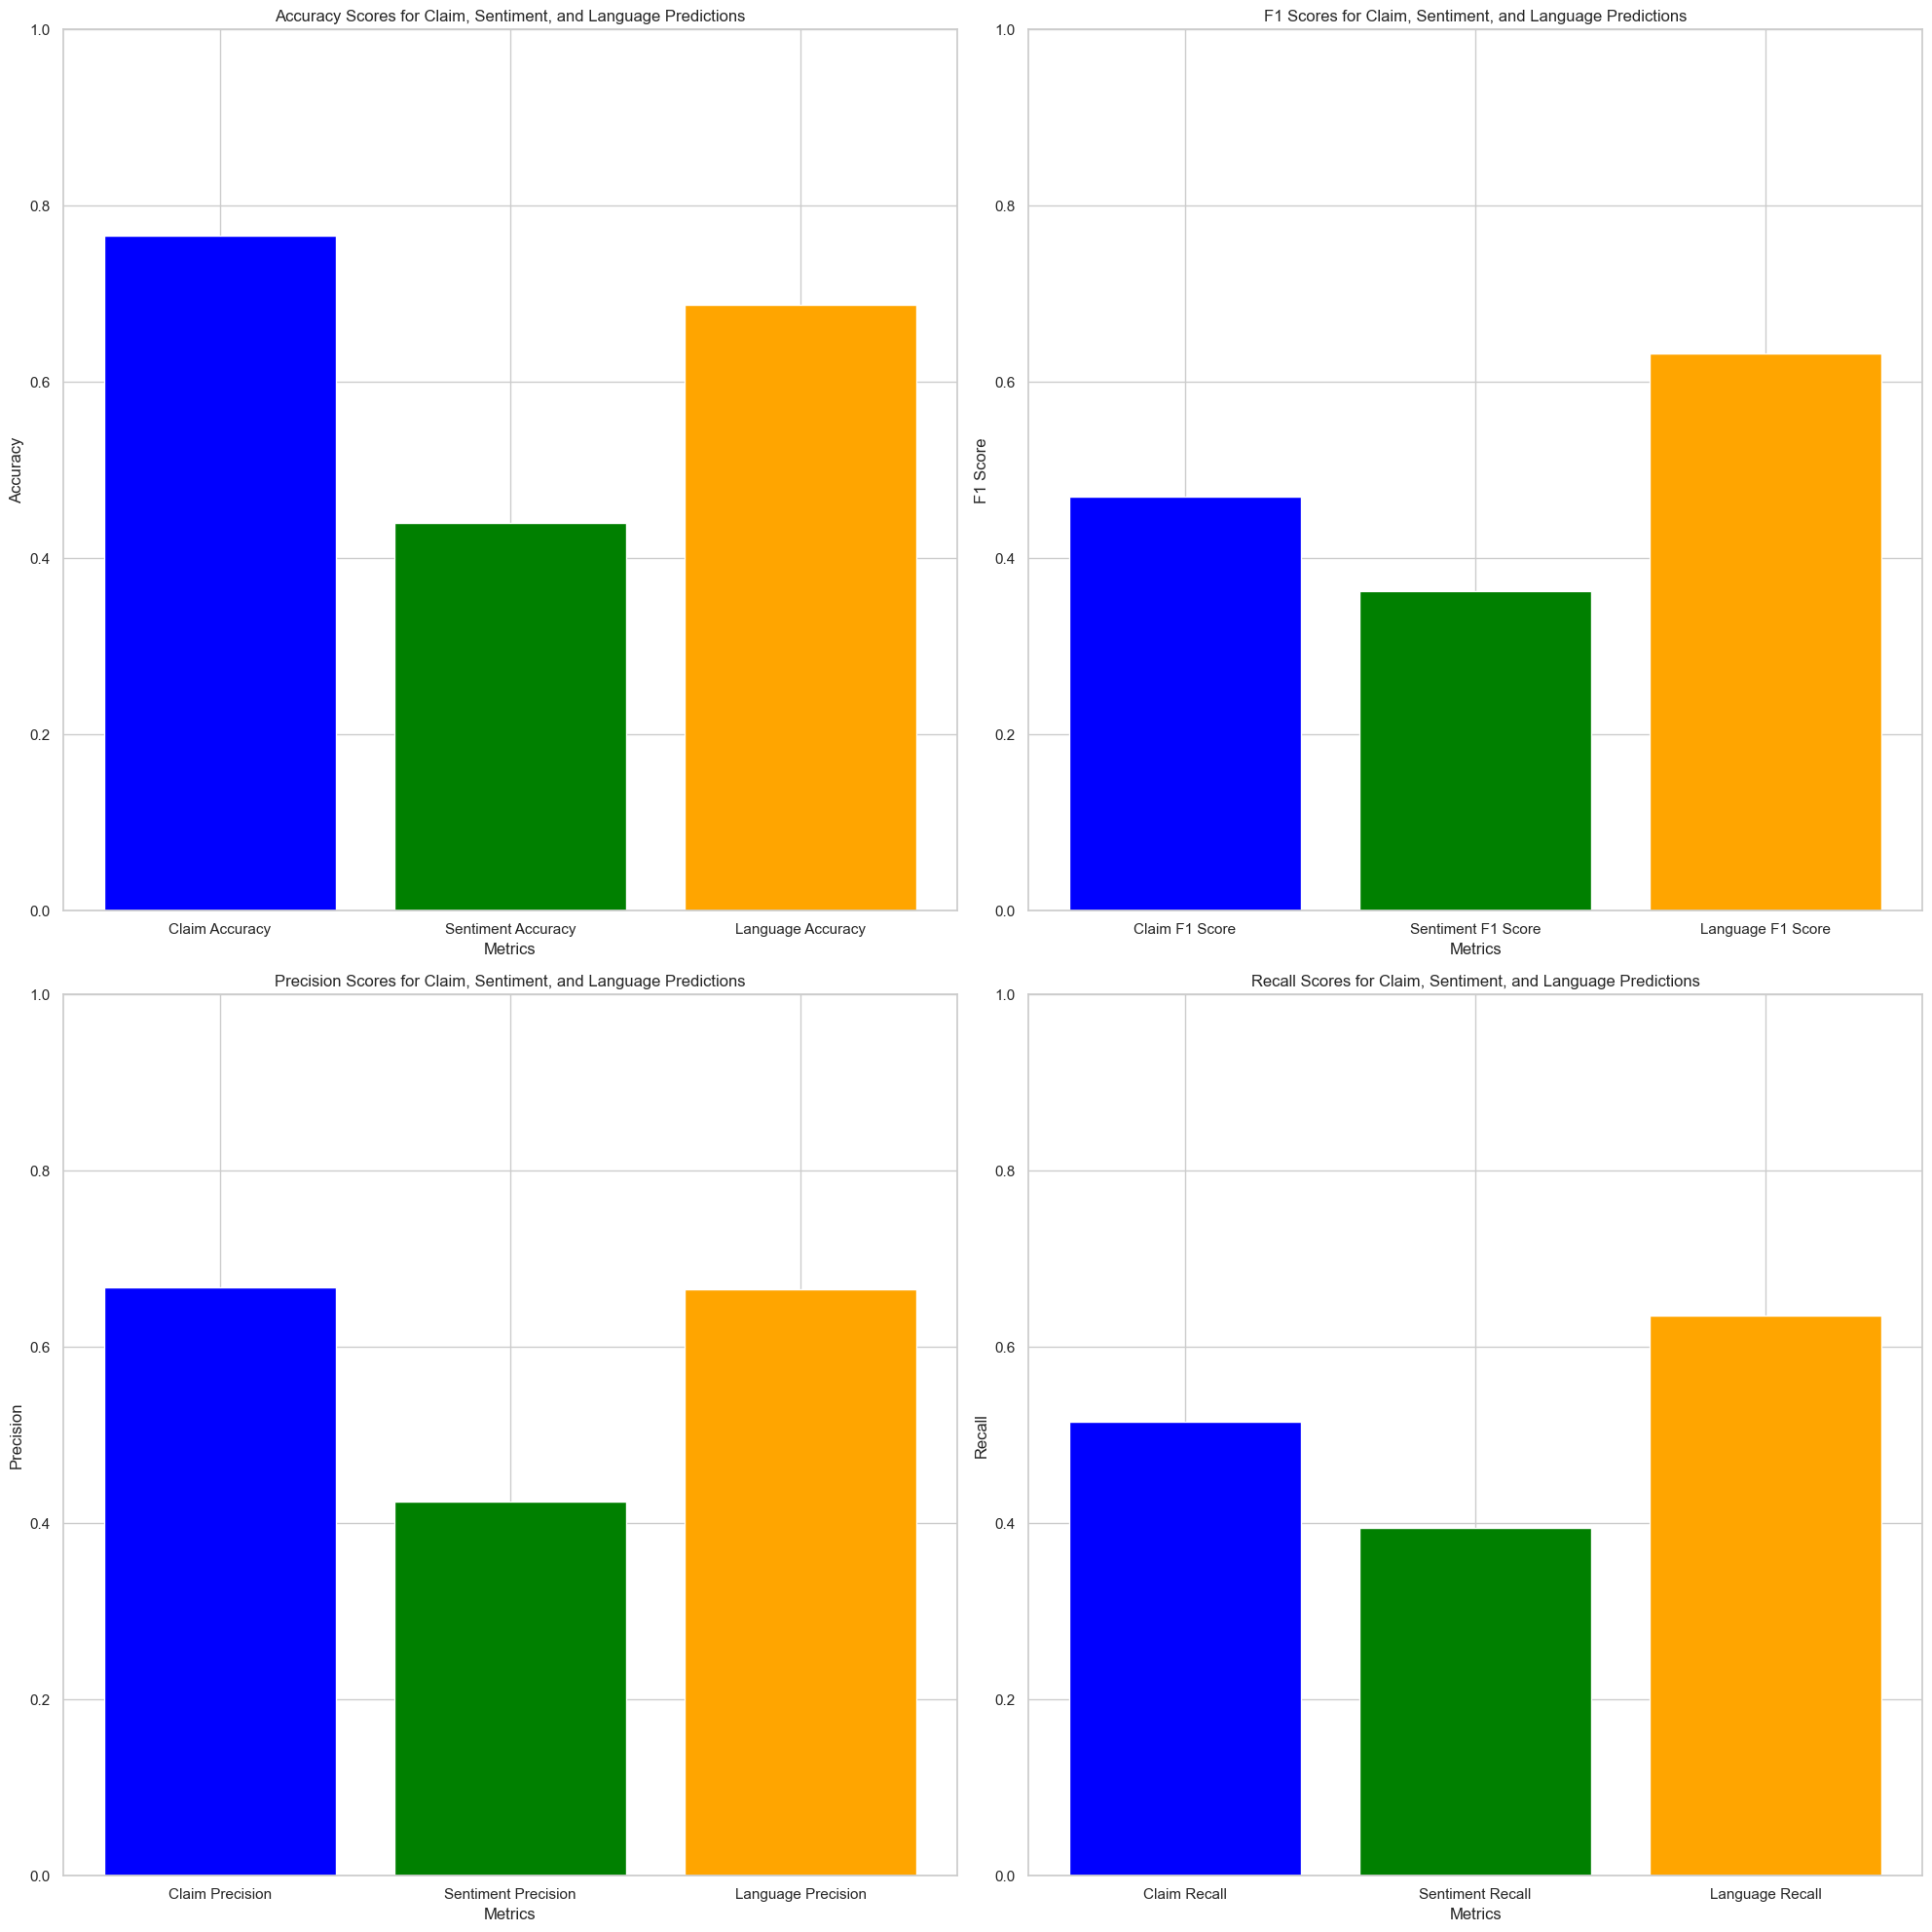

In [60]:
# Calculate the metrics
metrics_acc=['Claim Accuracy', 'Sentiment Accuracy', 'Language Accuracy']
scores_acc=[acc_score_cl, acc_score_sent, acc_score_lan]

metrics_f1=['Claim F1 Score', 'Sentiment F1 Score', 'Language F1 Score']
scores_f1=[f_score_cl, f_score_sent, f_score_lan]

metrics_pre=['Claim Precision', 'Sentiment Precision', 'Language Precision']
scores_pre=[pre_score_cl, pre_score_sent, pre_score_lan]

metrics_rec=['Claim Recall', 'Sentiment Recall', 'Language Recall']
scores_rec=[rec_score_cl, rec_score_sent, rec_score_lan]

# Set the style for the plots
sns.set(style='whitegrid')

# Create a figure and a 4x4 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Plot Accuracy
axs[0, 0].bar(metrics_acc, scores_acc, color=['blue', 'green', 'orange'])
axs[0, 0].set_title('Accuracy Scores for Claim, Sentiment, and Language Predictions')
axs[0, 0].set_xlabel('Metrics')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_ylim(0, 1)

# Plot F1 Score
axs[0, 1].bar(metrics_f1, scores_f1, color=['blue', 'green', 'orange'])
axs[0, 1].set_title('F1 Scores for Claim, Sentiment, and Language Predictions')
axs[0, 1].set_xlabel('Metrics')
axs[0, 1].set_ylabel('F1 Score')
axs[0, 1].set_ylim(0, 1)

# Plot Precision
axs[1, 0].bar(metrics_pre, scores_pre, color=['blue', 'green', 'orange'])
axs[1, 0].set_title('Precision Scores for Claim, Sentiment, and Language Predictions')
axs[1, 0].set_xlabel('Metrics')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].set_ylim(0, 1)

# Plot Recall
axs[1, 1].bar(metrics_rec, scores_rec, color=['blue', 'green', 'orange'])
axs[1, 1].set_title('Recall Scores for Claim, Sentiment, and Language Predictions')
axs[1, 1].set_xlabel('Metrics')
axs[1, 1].set_ylabel('Recall')
axs[1, 1].set_ylim(0, 1)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Confusion matrix

Text(67.25, 0.5, 'True Label')

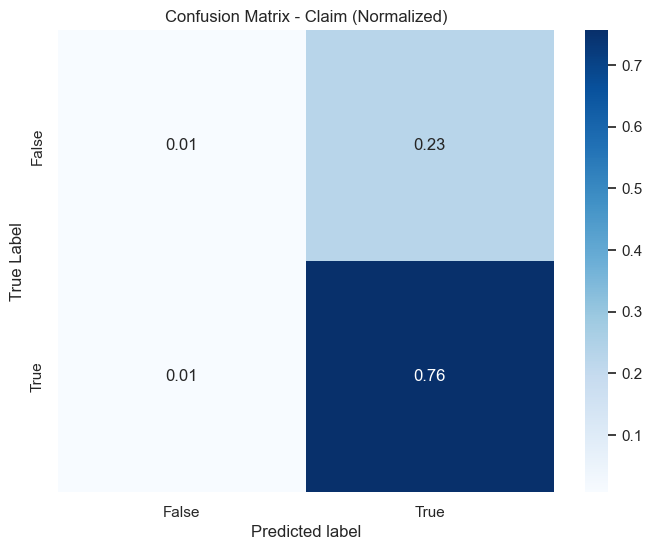

In [69]:
# Compute the confusion matrix
cm=confusion_matrix(df_test_claim['claim'], probabilities_claim)

# Normalize the confusion matrix
cm_normalized=cm/(len(df_test_claim))

# Create a DataFrame for better labeling in the hearmap
cm_df=pd.DataFrame(cm_normalized,
                   index=['False', 'True'],
                   columns=['False', 'True'])

# Set the style for the heatmap
sns.set(style='whitegrid')

# Create the hearmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='.2f', cmap='Blues', cbar=True, xticklabels=cm_df.columns, yticklabels=cm_df.index)

# Add titles and labels
plt.title('Confusion Matrix - Claim (Normalized)')
plt.xlabel('Predicted label')
plt.ylabel('True Label')

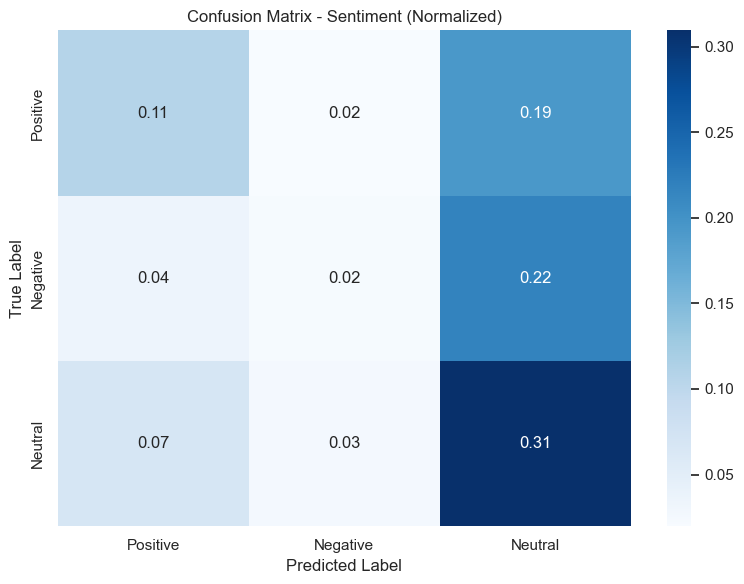

In [64]:
# Compute the confusion matrix
cm=confusion_matrix(df_test_sentiment['sentiment'], probabilities_sentiment)

# Normalize the confusion matrix
cm_normalized=cm/len(df_test_sentiment)

# Create a DataFrame for better labeling in the heatmap
labels=['Positive', 'Negative', 'Neutral']
cm_df=pd.DataFrame(cm_normalized, 
                     index=labels, 
                     columns=labels)

# Set the style for the heatmap
sns.set(style='whitegrid')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='.2f', cmap='Blues', cbar=True, 
            xticklabels=labels, yticklabels=labels)

# Add titles and labels
plt.title('Confusion Matrix - Sentiment (Normalized)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.tight_layout()
plt.show()

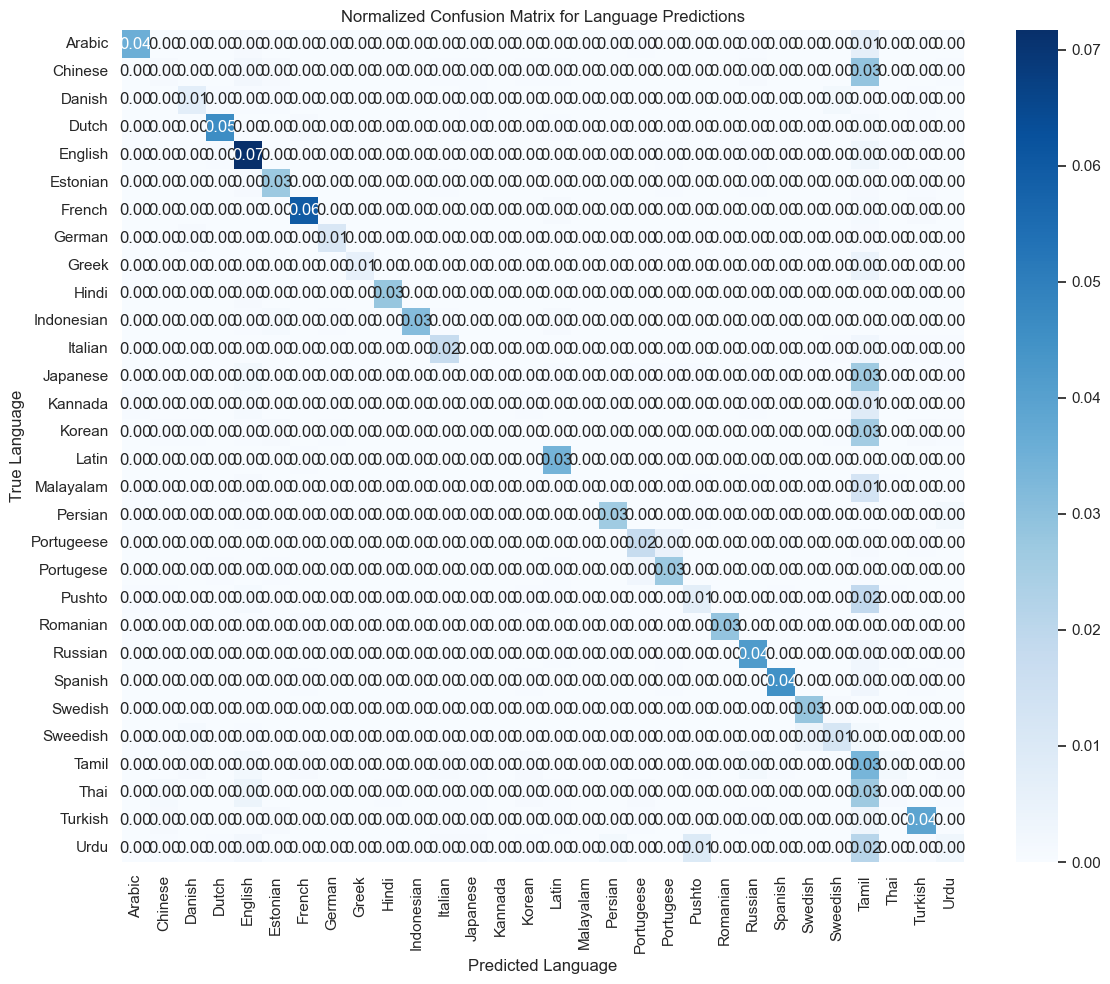

In [66]:
# Define the language labels
language_labels=[
    'Arabic', 'Chinese', 'Danish', 'Dutch', 'English', 'Estonian', 
    'French', 'German', 'Greek', 'Hindi', 'Indonesian', 'Italian', 
    'Japanese', 'Kannada', 'Korean', 'Latin', 'Malayalam', 'Persian', 
    'Portugeese', 'Portugese', 'Pushto', 'Romanian', 'Russian', 
    'Spanish', 'Swedish', 'Sweedish', 'Tamil', 'Thai', 'Turkish', 'Urdu'
]

# Compute the confusion matrix
cm=confusion_matrix(df_test_lang['language'], probabilities_lang)

# Normalize the confusion matrix
cm_normalized=cm / len(df_test_lang)

# Create a DataFrame for better labeling in the heatmap
cm_df=pd.DataFrame(cm_normalized, 
                     index=language_labels, 
                     columns=language_labels)

# Set the style for the heatmap
sns.set(style='whitegrid')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, annot=True, fmt='.2f', cmap='Blues', cbar=True, 
            xticklabels=language_labels, yticklabels=language_labels)

# Add titles and labels
plt.title('Normalized Confusion Matrix for Language Predictions')
plt.xlabel('Predicted Language')
plt.ylabel('True Language')

# Show the plot
plt.tight_layout()
plt.show()

## Model Performance Conlusion

**Claim Classification:**
- **Test Accuracy:** 0.76571
- **Test F1 Score:** 0.46948
- **Test Precision:** 0.66828
- **Test Recall:** 0.51491

**Sentiment Classification:**
- **Test Accuracy:** 0.44
- **Test F1 Score:** 0.36282
- **Test Precision:** 0.42416
- **Test Recall:** 0.39525

**Language Classification:**
- **Test Accuracy:** 0.68747
- **Test F1 Score:** 0.63292
- **Test Precision:** 0.66561
- **Test Recall:** 0.63626

### Summary

1. **Claim Classification:**
   - The model demonstrates a good test accuracy of 0.76571 for claim classification, indicating a decent level of correctness in its predictions. However, the F1 score is relatively lower at 0.46948, suggesting that while precision is quite high (0.66828), recall (0.51491) could be improved. This discrepancy between precision and recall may indicate that the model is more conservative in its predictions, which might affect the balance between false positives and false negatives.

2. **Sentiment Classification:**
   - The model's performance on sentiment classification is less effective, with a test accuracy of 0.44. Both the F1 score (0.36282) and the precision (0.42416) are relatively low, which suggests that the model struggles to accurately classify sentiment. The recall (0.39525) is also low, indicating that the model misses a significant number of relevant instances. This suggests that there is a need for improvement in handling sentiment-related features.

3. **Language Classification:**
   - For language classification, the model performs reasonably well, with a test accuracy of 0.68747. The F1 score of 0.63292, along with high precision (0.66561) and recall (0.63626), suggests a balanced performance. The model shows a good ability to both identify and correctly classify languages, though there is still room for improvement to reach a higher level of accuracy and F1 score.

### Recommendations

- **For Claim Classification:** Focus on improving recall to balance the precision-recall trade-off. Techniques such as data augmentation or additional feature engineering might help in capturing more relevant patterns.

- **For Sentiment Classification:** Consider re-evaluating the model architecture or trying different algorithms to enhance its performance. Data preprocessing and feature extraction might also play a significant role in improving the model's ability to understand sentiment.

- **For Language Classification:** The model performs well but could be further fine-tuned to enhance accuracy and F1 score. Experimenting with different hyperparameters and model architectures may yield better results.

Overall, the model shows promising performance in claim and language classification but needs significant improvement in sentiment classification to achieve a more balanced and accurate performance across all metrics.